In [2]:
import pandas as pd
import re
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler


In [3]:
data_path = "SoftwareEngineer_cleaned.csv"
df = pd.read_csv(data_path)
print(df.shape)
df.head()

(34012, 12)


,title,level,company,yearsofexperience,totalyearlycompensation,gender,Doctorate_Degree,Masters_Degree,Bachelors_Degree,tag,state,city
0,Software Engineer,SE 2,eBay,5.0,100000,NaN,0,0,0,NaN,CA,San Francisco
1,Software Engineer,60,Microsoft,5.0,157000,NaN,0,0,0,NaN,CA,Mountain View
2,Software Engineer,63,Microsoft,8.5,208000,NaN,0,0,0,NaN,WA,Seattle
3,Software Engineer,62,Microsoft,4.0,156000,NaN,0,0,0,NaN,WA,Seattle
4,Software Engineer,59,Microsoft,3.0,120000,NaN,0,0,0,NaN,WA,Redmond


In [4]:
headers1 = ["company", "yearsofexperience", "Doctorate_Degree", "Masters_Degree", "Bachelors_Degree", "state", "city", "tag", "gender", 'level', "totalyearlycompensation"]
cat = ["company", "state", "city", "tag", "gender", 'level']
df_clean = df[headers1]
df_clean

,company,yearsofexperience,Doctorate_Degree,Masters_Degree,Bachelors_Degree,state,city,tag,gender,level,totalyearlycompensation
0,eBay,5.0,0,0,0,CA,San Francisco,NaN,NaN,SE 2,100000
1,Microsoft,5.0,0,0,0,CA,Mountain View,NaN,NaN,60,157000
2,Microsoft,8.5,0,0,0,WA,Seattle,NaN,NaN,63,208000
3,Microsoft,4.0,0,0,0,WA,Seattle,NaN,NaN,62,156000
4,Microsoft,3.0,0,0,0,WA,Redmond,NaN,NaN,59,120000
...,...,...,...,...,...,...,...,...,...,...,...
34007,Google,10.0,0,0,0,WA,Seattle,Distributed Systems (Back-End),NaN,T4,327000
34008,Microsoft,2.0,0,0,0,WA,Redmond,Full Stack,NaN,62,237000
34009,MSFT,14.0,0,0,0,WA,Seattle,Full Stack,NaN,63,220000
34010,Salesforce,8.0,0,0,0,CA,San Francisco,iOS,NaN,Lead MTS,280000


In [6]:
summary = df_clean.describe()
print(summary)


       yearsofexperience  Doctorate_Degree  Masters_Degree  Bachelors_Degree  \
count       34012.000000      34012.000000    34012.000000      34012.000000   
mean            6.003482          0.023139        0.225714          0.180877   
std             5.167421          0.150347        0.418058          0.384922   
min             0.000000          0.000000        0.000000          0.000000   
25%             2.000000          0.000000        0.000000          0.000000   
50%             5.000000          0.000000        0.000000          0.000000   
75%             9.000000          0.000000        0.000000          0.000000   
max            29.000000          1.000000        1.000000          1.000000   

       totalyearlycompensation  
count             34012.000000  
mean             224651.105669  
std              113622.826878  
min               35000.000000  
25%              151000.000000  
50%              196000.000000  
75%              268000.000000  
max            

In [7]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse_output=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(df_clean[cat]), index=df_clean.index)

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(cat)
encode_df.head()

,company_10x Genomics,company_23andMe,company_2U,company_3M,company_3m,company_7-Eleven,company_7-eleven,company_8x8,company_ABB,company_ADP,...,level_unknown,level_vice president,level_x2,level_x4,level_x5,level_x6,level_x7,level_z4,level_||,level_nan
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df_clean = df_clean.merge(encode_df,left_index=True, right_index=True)
df_clean = df_clean.drop(cat,1)
df_clean# Merge one-hot encoded features and drop the originals
df_clean

C:\Users\pedia\AppData\Local\Temp\ipykernel_24220\1232695819.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_clean = df_clean.drop(cat,1)


,yearsofexperience,Doctorate_Degree,Masters_Degree,Bachelors_Degree,totalyearlycompensation,company_10x Genomics,company_23andMe,company_2U,company_3M,company_3m,...,level_unknown,level_vice president,level_x2,level_x4,level_x5,level_x6,level_x7,level_z4,level_||,level_nan
0,5.0,0,0,0,100000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.0,0,0,0,157000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8.5,0,0,0,208000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,0,0,0,156000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,0,0,0,120000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34007,10.0,0,0,0,327000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34008,2.0,0,0,0,237000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34009,14.0,0,0,0,220000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34010,8.0,0,0,0,280000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# Split our preprocessed data into our features and target arrays
y = df_clean.totalyearlycompensation
X = df_clean.drop(columns=["totalyearlycompensation"])

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78, train_size=0.8)

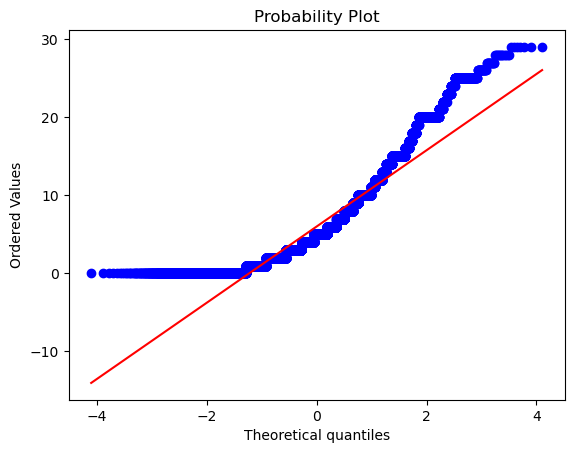

In [39]:
import matplotlib.pyplot as plt
from scipy.stats import probplot
z = df_clean.yearsofexperience
data = z
probplot(data, plot=plt)
plt.show()

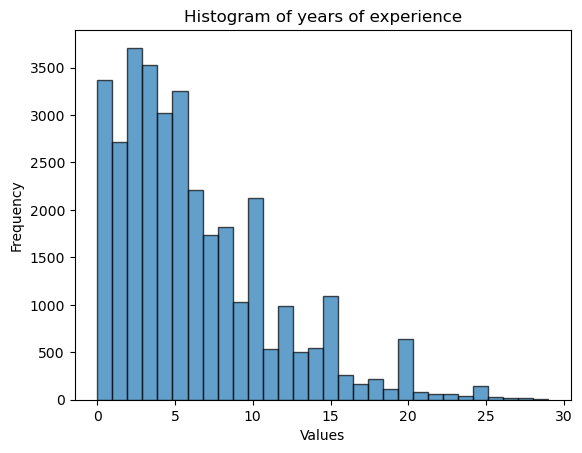

In [40]:
plt.hist(data, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of years of experience')
plt.show()

In [26]:
X_train = torch.from_numpy(X_train.values).float()
y_train = torch.from_numpy(y_train.values).float()
X_test = torch.from_numpy(X_test.values).float()
y_test = torch.from_numpy(y_test.values).float()

In [27]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)
X_train.shape



torch.Size([27209, 4215])

In [30]:
# Create a TensorDataset from the training data
train_data = TensorDataset(X_train, y_train)

# Create a DataLoader to handle the training data
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)

In [31]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(in_features=X_train.shape[1], out_features=1)
        
    def forward(self, x):
        return self.linear(x)

In [15]:
# Initialize the model
model = LinearRegression()
model.to(device)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [32]:

# Train the model
for epoch in range(100):
    for i, (X_batch, y_batch) in enumerate(train_loader):
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)

        # Forward pass
        predictions = model(X_batch)
        loss = criterion(predictions, y_batch)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/100], Loss: {loss.item():.4f}')


C:\Users\pedia\anaconda3\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\Users\pedia\anaconda3\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([9])) that is different to the input size (torch.Size([9, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [10/100], Loss: 39213891584.0000
Epoch [20/100], Loss: 51646681088.0000
Epoch [30/100], Loss: 81807646720.0000
Epoch [40/100], Loss: 54077509632.0000
Epoch [50/100], Loss: 59134230528.0000
Epoch [60/100], Loss: 39703322624.0000
Epoch [70/100], Loss: 54857871360.0000
Epoch [80/100], Loss: 69443330048.0000
Epoch [90/100], Loss: 32048418816.0000
Epoch [100/100], Loss: 57523716096.0000


In [14]:
loss = criterion(y_pred, y_train.view(-1, 1))


NameError: name 'y_pred' is not defined

# Normalization

The goal of normalization is to transform features to be on a similar scale. This improves the performance and training stability of the model.

Perform z-score normalization method. This process is necessary so that the machine learning models treat all variables equally, and a variable is not considered more important because it has a higher range of values

In [13]:
df['Totalyearlycopensation_Zscore_Normalize'] = zscore(df['totalyearlycompensation'])

display(df)

NameError: name 'zscore' is not defined